### Importing Necessary Libraries

In [57]:
#for data preprocessing
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split
#for feature importance(all except SVR and KNN) and model training
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
#for evaluation
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import GridSearchCV
#for insight generation and visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.diagnostic import linear_rainbow
import statsmodels.api as sm
from scipy import stats

## DATA PREPROCESSING

In [2]:
df=pd.read_csv('tips.csv')

In [3]:
df.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [6]:
#converting Categorical values in columns to Numerical
le=LabelEncoder()

In [7]:
df.sex.unique()

array(['Female', 'Male'], dtype=object)

In [8]:
df.smoker.unique()

array(['No', 'Yes'], dtype=object)

In [9]:
df.time.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [10]:
df.day.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [11]:
#since 'day' has a column with multiple unique values instead of just 2(binary)
#i have used label encoding
df['day']=le.fit_transform(df['day'])

In [12]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,2,Dinner,2
1,10.34,1.66,Male,No,2,Dinner,3
2,21.01,3.50,Male,No,2,Dinner,3
3,23.68,3.31,Male,No,2,Dinner,2
4,24.59,3.61,Female,No,2,Dinner,4


In [13]:
#for binary categorical values, i have used OneHotEncoding
df_encoded=pd.get_dummies(df, columns=['sex','smoker','time'],dtype=int,drop_first=True)

In [14]:
df_encoded.head()

,total_bill,tip,day,size,sex_Male,smoker_Yes,time_Lunch
0,16.99,1.01,2,2,0,0,0
1,10.34,1.66,2,3,1,0,0
2,21.01,3.50,2,3,1,0,0
3,23.68,3.31,2,2,1,0,0
4,24.59,3.61,2,4,0,0,0


In [15]:
df_encoded.dtypes

,0
total_bill,float64
tip,float64
day,int64
size,int64
sex_Male,int64
smoker_Yes,int64
time_Lunch,int64


splitting dataframe into X(features) and y(target)

In [16]:
X_df=df_encoded.drop(['tip'], axis=1)

In [17]:
X_df.columns

Index(['total_bill', 'day', 'size', 'sex_Male', 'smoker_Yes', 'time_Lunch'], dtype='object')

In [18]:
Y=df_encoded['tip']
Y

,tip
0,1.01
1,1.66
2,3.50
3,3.31
4,3.61
...,...
239,5.92
240,2.00
241,2.00
242,1.75


In [19]:
scaler=StandardScaler()
X=scaler.fit_transform(X_df)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## FEATURE IMPORTANCE AND MODEL TRAINING

In [21]:
def LinearRegr():
  linear_reg = LinearRegression()

  linear_reg.fit(X_train, y_train)

  return linear_reg.coef_, linear_reg

In [22]:
def RidgeRegr():
  ridge_reg = Ridge(alpha=1.0)

  ridge_reg.fit(X_train, y_train)

  return ridge_reg.coef_, ridge_reg

In [23]:
def LassoRegr():

  lasso_reg = Lasso(alpha=0.01)

  lasso_reg.fit(X_train, y_train)

  return lasso_reg.coef_, lasso_reg

In [24]:
def DTRegr():

  tree_reg = DecisionTreeRegressor(random_state=42, max_depth=None)

  tree_reg.fit(X_train, y_train)
  return tree_reg.feature_importances_ , tree_reg

In [25]:
def RFRegr():

  forest_reg = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)

  forest_reg.fit(X_train, y_train)

  return forest_reg.feature_importances_, forest_reg

In [26]:
def supportRegr():

    svr_reg = SVR(kernel='rbf', C=1.0, epsilon =0.1)
    svr_reg.fit(X_train, y_train)

    return None, svr_reg

In [27]:
def KNN():
  knn_reg = KNeighborsRegressor(n_neighbors=5)
  knn_reg.fit(X_train, y_train)

  return None, knn_reg

In [28]:
print("FEATURE IMPORTANCE ANALYSIS:\n")
fi={}
models={}

fi1,model_Linear=LinearRegr()
fi['Linear Regression']= fi1
models['Linear Regression']=model_Linear

fi2,model_Ridge=RidgeRegr()
fi['Ridge Regression']= fi2
models['Ridge Regression']=model_Ridge

fi3,model_Lasso=LassoRegr()
fi['Lasso Regression']= fi3
models['Lasso Regression']=model_Lasso

fi4,model_DT=DTRegr()
fi['Decision Tree Regressor']= fi4
models['Decision Tree Regressor']=model_DT

fi5,model_RF=RFRegr()
fi['Random Forest Regressor']= fi5
models['Random Forest Regressor']=model_RF

for model_name, importances in fi.items():
    print(f"{model_name} Feature Importances: {importances}")

FEATURE IMPORTANCE ANALYSIS:

Linear Regression Feature Importances: [ 0.83479592 -0.00631695  0.22808356  0.01566771 -0.09312391  0.02745106]
Ridge Regression Feature Importances: [ 0.828655   -0.00547279  0.23021215  0.01599729 -0.09161591  0.02577232]
Lasso Regression Feature Importances: [ 0.82335208  0.          0.22378775  0.00423364 -0.08129628  0.00884817]
Decision Tree Regressor Feature Importances: [0.75101967 0.07359048 0.05503883 0.02530147 0.06699063 0.02805892]
Random Forest Regressor Feature Importances: [0.76786957 0.06060586 0.05916932 0.02810981 0.07084057 0.01340487]


### **Feature Importance Results**

***Linear Regression***


Most influential feature: total_bill (0.835) - Strong positive correlation with tip amount.

Least influential feature: sex (-0.006) - Gender has a negligible impact on tip amount.


***Ridge Regression***- (Similar to Linear Regression with slight variations)


total_bill (0.829) remains the most significant.

sex (-0.005) and time (0.026) show minimal influence.


***Lasso Regression***
(Some coefficients reduced to zero due to regularization)

sex (0.000) and smoker (0.004) are deemed irrelevant.

total_bill (0.823) continues to dominate as the most impactful feature.


***Decision Tree Regressor***

Most influential feature: total_bill (75.1%) - Overwhelming influence on prediction.

Additional insights:
smoker (7.4%) and size (5.5%) show moderate importance.

Other features contribute minimally.


***Random Forest Regressor***

Robust insights from ensemble methods:
total_bill (76.8%) - Confirms its dominance as the primary factor.

smoker (6.1%) and size (5.9%) show moderate importance, similar to Decision Tree.

day and time have minimal impact.


### Insights For Management

1. Total Bill Amount is the most significant factor across all models, indicative of the fact that larger bulls strongly correlate with higher tips.

! Strategy ! - Upselling or promotion of higher value items

2. The size of the dining party has positive correlation with the tip amount.

! Strategy ! - Tailored sevices or group focused events and promotions

3. Time and Day show low importance and should not be given that much though - no temporal variance

## MODEL EVALUATION

In [29]:
_, model_SVR= supportRegr()
models['Support Vector Regression']=model_SVR
_, model_KNN= KNN()
models['K-Nearest Neighbour']=model_KNN

In [30]:
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mae_s=mae(y_test, predictions)
    mse_s= mse(y_test, predictions)
    r2_s= r2(y_test, predictions)
    return {"MAE": mae_s, "MSE": mse_s, "R2": r2_s}

In [35]:
model_performance={}
for model_name, model in models.items():
      results = evaluate_model(model, X_test, y_test)
      model_performance[model_name] = results
      print(f"{model_name} Performance: {results}")

Linear Regression Performance: {'MAE': 0.6703807496461147, 'MSE': 0.6948129686287681, 'R2': 0.4441368826121955}
Ridge Regression Performance: {'MAE': 0.6700178771822916, 'MSE': 0.693781187038004, 'R2': 0.44496232680710934}
Lasso Regression Performance: {'MAE': 0.6654464952271018, 'MSE': 0.6786067934209654, 'R2': 0.4571021199907097}
Decision Tree Regressor Performance: {'MAE': 0.890204081632653, 'MSE': 1.3079673469387756, 'R2': -0.04639786494730802}
Random Forest Regressor Performance: {'MAE': 0.7880102040816331, 'MSE': 0.9907901002040831, 'R2': 0.2073497492953763}
Support Vector Regression Performance: {'MAE': 0.662509813684227, 'MSE': 0.7173589972720936, 'R2': 0.4260996462158644}
K-Nearest Neighbour Performance: {'MAE': 0.7456734693877551, 'MSE': 0.8084286530612245, 'R2': 0.35324225141754195}


In [37]:
best_model_name = max(model_performance, key=lambda model: model_performance[model]['R2'])
print(f"Best model based on R2: {best_model_name}")

best_model = models[best_model_name]

Best model based on R2: Lasso Regression


The 𝑅2 score, also known as the coefficient of determination, measures how well the independent variables (features) explain the variation in the dependent variable (target).

With an 𝑅2 score of 0.457, the Lasso Regression model explains about 45.7% of the variation in the tipping amount. While this is a moderate fit, there is room for improvement through techniques like hyperparameter tuning.

In [41]:
#Hyper Parameter Tuning
def tune_lasso(X_train, y_train):
    lasso = Lasso()
    param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
    grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    return grid_search.best_estimator_, grid_search.best_params_

In [42]:
best_lasso_model, best_lasso_params = tune_lasso(X_train, y_train)
print(f"Best Lasso Parameters: {best_lasso_params}")

Best Lasso Parameters: {'alpha': 0.1}


In [44]:
best_lasso_reg = Lasso(alpha=0.1)
best_lasso_reg.fit(X_train, y_train)

print(evaluate_model(best_lasso_reg, X_test, y_test))

{'MAE': 0.6548826462669449, 'MSE': 0.6121049965780792, 'R2': 0.5103047770711185}


All performance metrics have been improved upon.

In [45]:
def plot_scatter(X, y):
    plt.figure(figsize=(10, 6))
    for idx, col in enumerate(X.columns):
        plt.subplot(2, 3, idx + 1)
        plt.scatter(X[col], y, alpha=0.5)
        plt.title(f"{col} vs Tip")
    plt.tight_layout()
    plt.show()

def plot_correlation_matrix(data):
    plt.figure(figsize=(8, 6))
    sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
    plt.title("Correlation Matrix")
    plt.show()

def perform_rainbow_test(X, y):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    rainbow_statistic, p_value = linear_rainbow(model)
    return {"Rainbow Statistic": rainbow_statistic, "p-value": p_value}

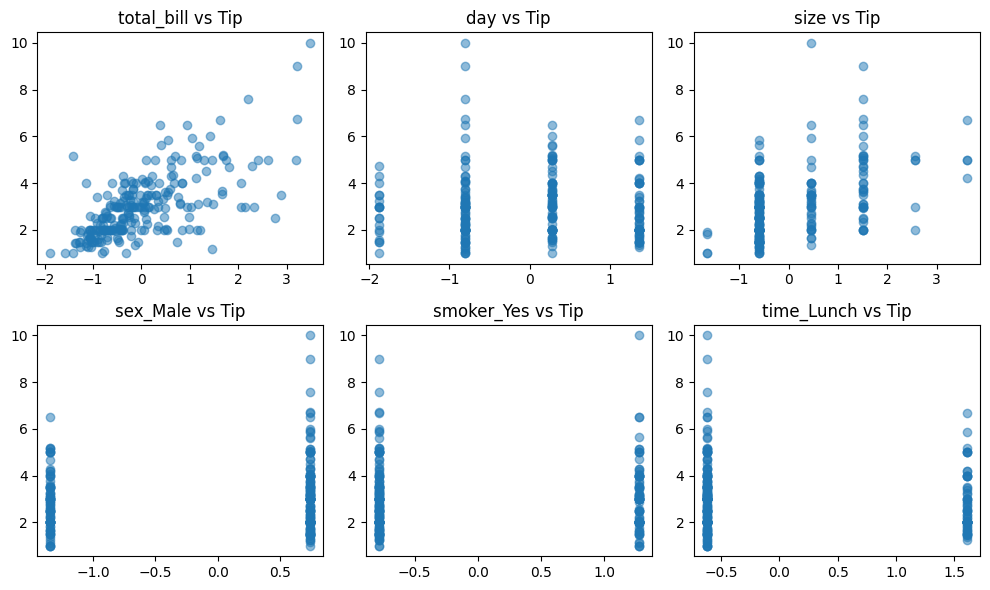

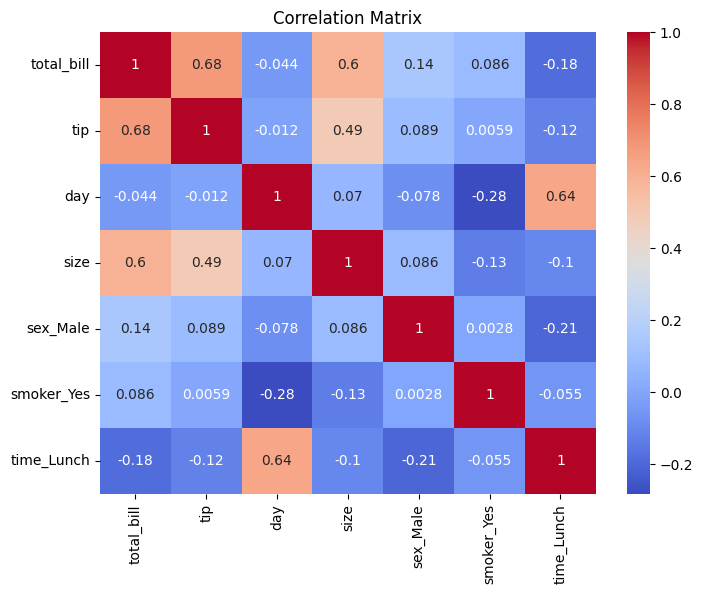

Linearity Test Results: {'Rainbow Statistic': 1.2036274510126594, 'p-value': 0.15798464222013228}


In [49]:
plot_scatter(pd.DataFrame(X, columns=X_df.columns),Y)
plot_correlation_matrix(df_encoded)
linearity_results = perform_rainbow_test(X, Y)
print(f"Linearity Test Results: {linearity_results}")

A p-value above 0.05 suggests that there is no significant evidence to reject the linearity assumption.

Here, the p-value is 0.158, which is above 0.05, so the test suggests that the relationship in the data can be reasonably approximated by a linear model.

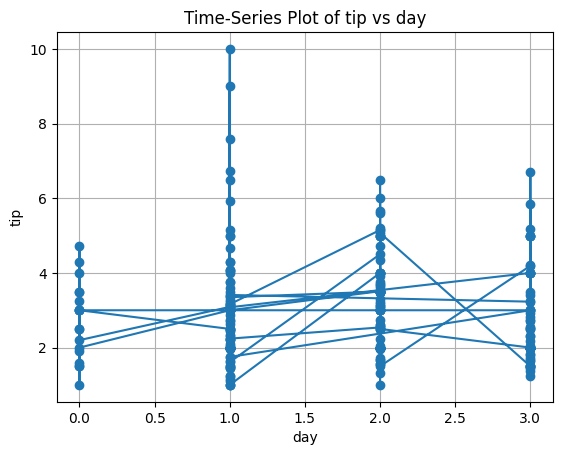

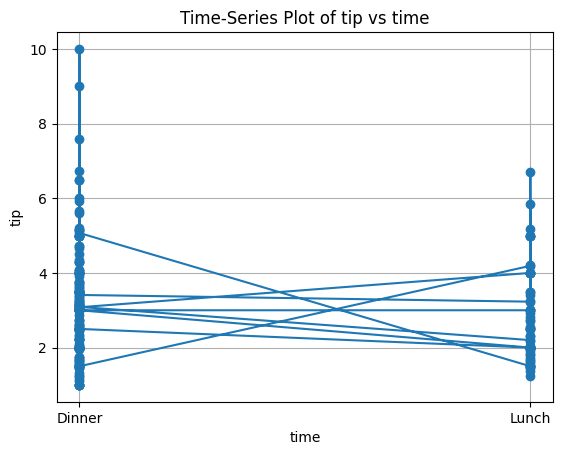

In [55]:
def plot_time_series(data, time_col, target_col):
    plt.plot(data[time_col], data[target_col], marker='o')
    plt.title(f"Time-Series Plot of {target_col} vs {time_col}")
    plt.xlabel(time_col)
    plt.ylabel(target_col)
    plt.grid()
    plt.show()

plot_time_series(df, 'day', 'tip')

plot_time_series(df, 'time', 'tip')

While there is no clear time series trend for the day-wise split, most of the higher tips appear to occur during Dinner. A genuine trend showing that customers tip more generously in the evening can be seen using the outliers.

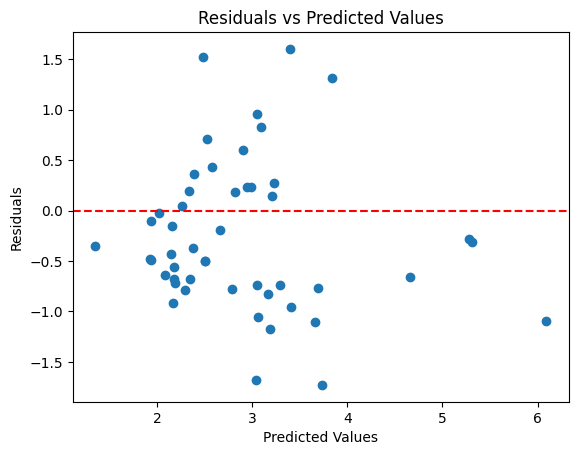

In [50]:
def plot_residuals(model, X, y):

    y_pred = model.predict(X)
    residuals = y - y_pred

    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title("Residuals vs Predicted Values")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.show()

plot_residuals(best_lasso_model, X_test, y_test)

The residuals seem somewhat randomly distributed, but there is a slight concentration near certain predicted values, which could indicate some clustering or structure in the data

 few points lie farther from the zero line, which could indicate potential outliers.

In [52]:
from statsmodels.stats.diagnostic import het_breuschpagan

X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(Y, X).fit()

# Perform Breusch-Pagan test
bp_test = het_breuschpagan(model.resid, model.model.exog)

# Extract test results
bp_stat = bp_test[0]  # Breusch-Pagan statistic
bp_pvalue = bp_test[1]  # p-value for the test

print(f"Breusch-Pagan Test Statistic: {bp_stat}")
print(f"p-value: {bp_pvalue}")

# Interpretation
if bp_pvalue < 0.05:
    print("The p-value is less than 0.05, suggesting heteroscedasticity (variance is not constant).")
else:
    print("The p-value is greater than 0.05, suggesting homoscedasticity (variance is constant).")


Breusch-Pagan Test Statistic: 54.06991015362725
p-value: 7.141511507460711e-10
The p-value is less than 0.05, suggesting heteroscedasticity (variance is not constant).
